# Trabajo Práctico 3 - Regularización aplicada a la EPH 

## Gil Deza, Hüppi Lo Prete, Walker 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

In [2]:
# Utilizamos el código de la clase tutorial para crear un botón para ocultar el código 
#Fuente: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

### Parte I

#### 1) 

Las variables que pueden servir como predictores para entender si un hogar es pobre o no son:
        -Variables que representan las características de la vivienda como el acceso al agua, a un baño, materiales de construcción y si está dentro de un barrio de emergencia. 
        -Variables que representan las características habitacionales del hogar como por ejemplo, la cantidad de cuartos destinados para dormir, régimen de tenecia del terreno y qué combustible se utiliza para cocinar. 
        -Variables denominada "Estrategias del hogar", entre ellas se encuentran si cobran un subsidio, si tienen una beca de estudio, si tuvieron que vender sus pertenencias en el último tiempo,  menores de edad trabajando, cantidad de personas que viven en el hogar, decil de ingresos, entre otras. Consideramos que esta última variable es muy relevante dado que marca la diferencia entre medir la pobreza a nivel hogar o a nivel individuo debido a que hogares pobres tienden a tener más miembros.

#### 2)

In [2]:
# Abrimos la base de hogar 
df=pd.read_excel("usu_hogar_T122.xls")
df
# Abrimos la tabla de usuarios 
df_usu=pd.read_excel("usu_individual_T122.xls")

In [3]:
# Armamos un nuevo df solo con las observaciones de Buenos Aires y Gran Buenos Aires
df_ba = df.loc[df['AGLOMERADO'].isin([32, 33])]
df_ba


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
11,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,S,33,4625,2,...,0.0,NaN,0,4410,1,0,98,0,0,0
23,TQRMNOPSSHKKMMCDEIIAD00780111,2022,1,1,1,1,S,32,803,1,...,10.0,NaN,8,1440,1,2,98,0,0,0
52,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,10.0,NaN,9,4073,2,0,98,0,0,0
61,TQRMNORUPHMLRMCDEIJAH00698717,2022,1,1,1,1,S,33,1698,1,...,12.0,NaN,12,0,2,1,3,0,0,0
72,TQRMNOTUYHMMKNCDEIJAH00698671,2022,1,1,1,1,S,33,3764,1,...,12.0,NaN,12,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16778,TQRMNOPXQHJOKPCDEIJAH00718715,2022,1,1,1,1,S,33,3278,1,...,1.0,NaN,1,5814,2,0,3,4,0,0
16779,TQRMNOPXRHJOKPCDEIJAH00718716,2022,1,1,1,1,S,33,3976,1,...,3.0,NaN,4,6427,2,1,3,4,0,0
16780,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,S,33,2607,1,...,3.0,NaN,4,5084,1,2,98,0,0,0
16781,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,S,33,2325,1,...,5.0,NaN,6,4528,1,2,98,0,0,0


#### 3)

In [4]:
df_ba_unido = pd.merge(df_ba, df_usu, on=("CODUSU","NRO_HOGAR"), how="inner", validate="one_to_many")
df_ba_unido
print(list(df_ba_unido.columns))

['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV1_ESP', 'IV2', 'IV3', 'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF_x', 'DECIFR_x', 'IDECIFR_x', 'RDECIFR_x', 'GDECIFR_x', 'PDECIFR_x', 'ADECIFR_x', 'IPCF_x', 'DECCFR_x', 'IDECCFR_x', 'RDECCFR_x', 'GDECCFR_x', 'PDECCFR_x', 'ADECCFR_x', 'PONDIH_x', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'ANO4_y', 'TRIMESTRE_y', 'COMPONENTE', 'H15', 'REGION_y', 'MAS_500_y', 'AGLOMERADO_y', 'PONDERA_y', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 

Eliminamos todas las columnas duplicadas luego del merge, dado que se encontraban en ambas bases.

In [5]:
# Observamos cuáles son las columnas que están repetidas, antes de eliminarlas:
df_variables_dup = df_ba_unido.filter(regex='_y')
df_variables_dup

# Las eliminamos
df_ba_unido.drop(columns=(df_ba_unido.filter(regex='_y')), inplace=True)

print(list(df_ba_unido.columns))

['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'MAS_500_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV1_ESP', 'IV2', 'IV3', 'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF_x', 'DECIFR_x', 'IDECIFR_x', 'RDECIFR_x', 'GDECIFR_x', 'PDECIFR_x', 'ADECIFR_x', 'IPCF_x', 'DECCFR_x', 'IDECCFR_x', 'RDECCFR_x', 'GDECCFR_x', 'PDECCFR_x', 'ADECCFR_x', 'PONDIH_x', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'COMPONENTE', 'H15', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', '

#### 4)

Utilizamos la función dropna del paquete de Pandas para eliminar columnas con observaciones vacias

#### 5)

In [6]:
# Limpiamos la base de los datos nulos
# Eliminamos columnas que tienen más del 50% de observaciones vacías 
df_ba_unido_limpio = df_ba_unido.dropna(axis=1, thresh=3372)
#df_ba_unido_limpio.to_excel("base2.xlsx", sheet_name="sheet1", index=False)

In [7]:
# Chequeamos que ya no quedan missings values
for i in range(len(df_ba_unido_limpio.index)) : 
    print("Número de missing values en la fila", i + 1, ":",
         df_ba_unido_limpio.iloc[i].isnull().sum())

Número de missing values en la fila 1 : 0
Número de missing values en la fila 2 : 0
Número de missing values en la fila 3 : 0
Número de missing values en la fila 4 : 0
Número de missing values en la fila 5 : 0
Número de missing values en la fila 6 : 0
Número de missing values en la fila 7 : 0
Número de missing values en la fila 8 : 0
Número de missing values en la fila 9 : 0
Número de missing values en la fila 10 : 0
Número de missing values en la fila 11 : 0
Número de missing values en la fila 12 : 0
Número de missing values en la fila 13 : 0
Número de missing values en la fila 14 : 0
Número de missing values en la fila 15 : 0
Número de missing values en la fila 16 : 0
Número de missing values en la fila 17 : 0
Número de missing values en la fila 18 : 0
Número de missing values en la fila 19 : 0
Número de missing values en la fila 20 : 0
Número de missing values en la fila 21 : 0
Número de missing values en la fila 22 : 0
Número de missing values en la fila 23 : 0
Número de missing va

Número de missing values en la fila 314 : 0
Número de missing values en la fila 315 : 0
Número de missing values en la fila 316 : 0
Número de missing values en la fila 317 : 0
Número de missing values en la fila 318 : 0
Número de missing values en la fila 319 : 0
Número de missing values en la fila 320 : 0
Número de missing values en la fila 321 : 0
Número de missing values en la fila 322 : 0
Número de missing values en la fila 323 : 0
Número de missing values en la fila 324 : 0
Número de missing values en la fila 325 : 0
Número de missing values en la fila 326 : 0
Número de missing values en la fila 327 : 0
Número de missing values en la fila 328 : 0
Número de missing values en la fila 329 : 0
Número de missing values en la fila 330 : 0
Número de missing values en la fila 331 : 0
Número de missing values en la fila 332 : 0
Número de missing values en la fila 333 : 0
Número de missing values en la fila 334 : 0
Número de missing values en la fila 335 : 0
Número de missing values en la f

Número de missing values en la fila 543 : 0
Número de missing values en la fila 544 : 0
Número de missing values en la fila 545 : 0
Número de missing values en la fila 546 : 0
Número de missing values en la fila 547 : 0
Número de missing values en la fila 548 : 0
Número de missing values en la fila 549 : 0
Número de missing values en la fila 550 : 0
Número de missing values en la fila 551 : 0
Número de missing values en la fila 552 : 0
Número de missing values en la fila 553 : 1
Número de missing values en la fila 554 : 0
Número de missing values en la fila 555 : 0
Número de missing values en la fila 556 : 0
Número de missing values en la fila 557 : 0
Número de missing values en la fila 558 : 0
Número de missing values en la fila 559 : 0
Número de missing values en la fila 560 : 0
Número de missing values en la fila 561 : 0
Número de missing values en la fila 562 : 0
Número de missing values en la fila 563 : 0
Número de missing values en la fila 564 : 0
Número de missing values en la f

Número de missing values en la fila 792 : 0
Número de missing values en la fila 793 : 0
Número de missing values en la fila 794 : 0
Número de missing values en la fila 795 : 0
Número de missing values en la fila 796 : 0
Número de missing values en la fila 797 : 0
Número de missing values en la fila 798 : 0
Número de missing values en la fila 799 : 0
Número de missing values en la fila 800 : 0
Número de missing values en la fila 801 : 0
Número de missing values en la fila 802 : 0
Número de missing values en la fila 803 : 0
Número de missing values en la fila 804 : 0
Número de missing values en la fila 805 : 0
Número de missing values en la fila 806 : 0
Número de missing values en la fila 807 : 0
Número de missing values en la fila 808 : 0
Número de missing values en la fila 809 : 0
Número de missing values en la fila 810 : 0
Número de missing values en la fila 811 : 0
Número de missing values en la fila 812 : 0
Número de missing values en la fila 813 : 0
Número de missing values en la f

Número de missing values en la fila 1061 : 0
Número de missing values en la fila 1062 : 0
Número de missing values en la fila 1063 : 0
Número de missing values en la fila 1064 : 0
Número de missing values en la fila 1065 : 0
Número de missing values en la fila 1066 : 0
Número de missing values en la fila 1067 : 0
Número de missing values en la fila 1068 : 0
Número de missing values en la fila 1069 : 0
Número de missing values en la fila 1070 : 0
Número de missing values en la fila 1071 : 0
Número de missing values en la fila 1072 : 0
Número de missing values en la fila 1073 : 0
Número de missing values en la fila 1074 : 0
Número de missing values en la fila 1075 : 0
Número de missing values en la fila 1076 : 0
Número de missing values en la fila 1077 : 0
Número de missing values en la fila 1078 : 0
Número de missing values en la fila 1079 : 0
Número de missing values en la fila 1080 : 0
Número de missing values en la fila 1081 : 0
Número de missing values en la fila 1082 : 0
Número de 

Número de missing values en la fila 1363 : 0
Número de missing values en la fila 1364 : 0
Número de missing values en la fila 1365 : 0
Número de missing values en la fila 1366 : 0
Número de missing values en la fila 1367 : 0
Número de missing values en la fila 1368 : 0
Número de missing values en la fila 1369 : 0
Número de missing values en la fila 1370 : 0
Número de missing values en la fila 1371 : 0
Número de missing values en la fila 1372 : 0
Número de missing values en la fila 1373 : 0
Número de missing values en la fila 1374 : 0
Número de missing values en la fila 1375 : 0
Número de missing values en la fila 1376 : 0
Número de missing values en la fila 1377 : 0
Número de missing values en la fila 1378 : 0
Número de missing values en la fila 1379 : 0
Número de missing values en la fila 1380 : 0
Número de missing values en la fila 1381 : 0
Número de missing values en la fila 1382 : 0
Número de missing values en la fila 1383 : 0
Número de missing values en la fila 1384 : 0
Número de 

Número de missing values en la fila 1632 : 0
Número de missing values en la fila 1633 : 0
Número de missing values en la fila 1634 : 0
Número de missing values en la fila 1635 : 0
Número de missing values en la fila 1636 : 0
Número de missing values en la fila 1637 : 0
Número de missing values en la fila 1638 : 0
Número de missing values en la fila 1639 : 0
Número de missing values en la fila 1640 : 0
Número de missing values en la fila 1641 : 0
Número de missing values en la fila 1642 : 0
Número de missing values en la fila 1643 : 0
Número de missing values en la fila 1644 : 0
Número de missing values en la fila 1645 : 0
Número de missing values en la fila 1646 : 0
Número de missing values en la fila 1647 : 0
Número de missing values en la fila 1648 : 0
Número de missing values en la fila 1649 : 0
Número de missing values en la fila 1650 : 0
Número de missing values en la fila 1651 : 0
Número de missing values en la fila 1652 : 0
Número de missing values en la fila 1653 : 0
Número de 

Número de missing values en la fila 1942 : 0
Número de missing values en la fila 1943 : 0
Número de missing values en la fila 1944 : 0
Número de missing values en la fila 1945 : 0
Número de missing values en la fila 1946 : 0
Número de missing values en la fila 1947 : 0
Número de missing values en la fila 1948 : 0
Número de missing values en la fila 1949 : 0
Número de missing values en la fila 1950 : 0
Número de missing values en la fila 1951 : 0
Número de missing values en la fila 1952 : 0
Número de missing values en la fila 1953 : 0
Número de missing values en la fila 1954 : 0
Número de missing values en la fila 1955 : 0
Número de missing values en la fila 1956 : 0
Número de missing values en la fila 1957 : 0
Número de missing values en la fila 1958 : 0
Número de missing values en la fila 1959 : 0
Número de missing values en la fila 1960 : 0
Número de missing values en la fila 1961 : 0
Número de missing values en la fila 1962 : 0
Número de missing values en la fila 1963 : 0
Número de 

Número de missing values en la fila 2201 : 0
Número de missing values en la fila 2202 : 0
Número de missing values en la fila 2203 : 0
Número de missing values en la fila 2204 : 0
Número de missing values en la fila 2205 : 0
Número de missing values en la fila 2206 : 0
Número de missing values en la fila 2207 : 0
Número de missing values en la fila 2208 : 0
Número de missing values en la fila 2209 : 0
Número de missing values en la fila 2210 : 0
Número de missing values en la fila 2211 : 0
Número de missing values en la fila 2212 : 0
Número de missing values en la fila 2213 : 0
Número de missing values en la fila 2214 : 0
Número de missing values en la fila 2215 : 0
Número de missing values en la fila 2216 : 0
Número de missing values en la fila 2217 : 0
Número de missing values en la fila 2218 : 0
Número de missing values en la fila 2219 : 0
Número de missing values en la fila 2220 : 0
Número de missing values en la fila 2221 : 0
Número de missing values en la fila 2222 : 0
Número de 

Número de missing values en la fila 2474 : 0
Número de missing values en la fila 2475 : 0
Número de missing values en la fila 2476 : 0
Número de missing values en la fila 2477 : 0
Número de missing values en la fila 2478 : 0
Número de missing values en la fila 2479 : 1
Número de missing values en la fila 2480 : 0
Número de missing values en la fila 2481 : 0
Número de missing values en la fila 2482 : 0
Número de missing values en la fila 2483 : 0
Número de missing values en la fila 2484 : 0
Número de missing values en la fila 2485 : 0
Número de missing values en la fila 2486 : 0
Número de missing values en la fila 2487 : 0
Número de missing values en la fila 2488 : 0
Número de missing values en la fila 2489 : 0
Número de missing values en la fila 2490 : 0
Número de missing values en la fila 2491 : 0
Número de missing values en la fila 2492 : 0
Número de missing values en la fila 2493 : 0
Número de missing values en la fila 2494 : 0
Número de missing values en la fila 2495 : 0
Número de 

Número de missing values en la fila 2752 : 0
Número de missing values en la fila 2753 : 0
Número de missing values en la fila 2754 : 0
Número de missing values en la fila 2755 : 0
Número de missing values en la fila 2756 : 0
Número de missing values en la fila 2757 : 0
Número de missing values en la fila 2758 : 0
Número de missing values en la fila 2759 : 0
Número de missing values en la fila 2760 : 0
Número de missing values en la fila 2761 : 0
Número de missing values en la fila 2762 : 0
Número de missing values en la fila 2763 : 0
Número de missing values en la fila 2764 : 0
Número de missing values en la fila 2765 : 0
Número de missing values en la fila 2766 : 0
Número de missing values en la fila 2767 : 0
Número de missing values en la fila 2768 : 0
Número de missing values en la fila 2769 : 0
Número de missing values en la fila 2770 : 0
Número de missing values en la fila 2771 : 0
Número de missing values en la fila 2772 : 0
Número de missing values en la fila 2773 : 0
Número de 

Número de missing values en la fila 2987 : 0
Número de missing values en la fila 2988 : 0
Número de missing values en la fila 2989 : 0
Número de missing values en la fila 2990 : 0
Número de missing values en la fila 2991 : 0
Número de missing values en la fila 2992 : 0
Número de missing values en la fila 2993 : 0
Número de missing values en la fila 2994 : 0
Número de missing values en la fila 2995 : 0
Número de missing values en la fila 2996 : 0
Número de missing values en la fila 2997 : 0
Número de missing values en la fila 2998 : 0
Número de missing values en la fila 2999 : 0
Número de missing values en la fila 3000 : 0
Número de missing values en la fila 3001 : 0
Número de missing values en la fila 3002 : 0
Número de missing values en la fila 3003 : 0
Número de missing values en la fila 3004 : 0
Número de missing values en la fila 3005 : 0
Número de missing values en la fila 3006 : 0
Número de missing values en la fila 3007 : 0
Número de missing values en la fila 3008 : 0
Número de 

Número de missing values en la fila 3275 : 0
Número de missing values en la fila 3276 : 0
Número de missing values en la fila 3277 : 0
Número de missing values en la fila 3278 : 0
Número de missing values en la fila 3279 : 0
Número de missing values en la fila 3280 : 0
Número de missing values en la fila 3281 : 0
Número de missing values en la fila 3282 : 0
Número de missing values en la fila 3283 : 0
Número de missing values en la fila 3284 : 0
Número de missing values en la fila 3285 : 0
Número de missing values en la fila 3286 : 0
Número de missing values en la fila 3287 : 0
Número de missing values en la fila 3288 : 0
Número de missing values en la fila 3289 : 0
Número de missing values en la fila 3290 : 0
Número de missing values en la fila 3291 : 0
Número de missing values en la fila 3292 : 0
Número de missing values en la fila 3293 : 0
Número de missing values en la fila 3294 : 0
Número de missing values en la fila 3295 : 0
Número de missing values en la fila 3296 : 0
Número de 

Número de missing values en la fila 3501 : 0
Número de missing values en la fila 3502 : 0
Número de missing values en la fila 3503 : 0
Número de missing values en la fila 3504 : 0
Número de missing values en la fila 3505 : 0
Número de missing values en la fila 3506 : 0
Número de missing values en la fila 3507 : 0
Número de missing values en la fila 3508 : 0
Número de missing values en la fila 3509 : 0
Número de missing values en la fila 3510 : 0
Número de missing values en la fila 3511 : 0
Número de missing values en la fila 3512 : 0
Número de missing values en la fila 3513 : 0
Número de missing values en la fila 3514 : 0
Número de missing values en la fila 3515 : 0
Número de missing values en la fila 3516 : 0
Número de missing values en la fila 3517 : 0
Número de missing values en la fila 3518 : 0
Número de missing values en la fila 3519 : 0
Número de missing values en la fila 3520 : 0
Número de missing values en la fila 3521 : 0
Número de missing values en la fila 3522 : 0
Número de 

Número de missing values en la fila 3777 : 0
Número de missing values en la fila 3778 : 0
Número de missing values en la fila 3779 : 0
Número de missing values en la fila 3780 : 0
Número de missing values en la fila 3781 : 0
Número de missing values en la fila 3782 : 0
Número de missing values en la fila 3783 : 0
Número de missing values en la fila 3784 : 0
Número de missing values en la fila 3785 : 0
Número de missing values en la fila 3786 : 0
Número de missing values en la fila 3787 : 0
Número de missing values en la fila 3788 : 0
Número de missing values en la fila 3789 : 0
Número de missing values en la fila 3790 : 0
Número de missing values en la fila 3791 : 0
Número de missing values en la fila 3792 : 0
Número de missing values en la fila 3793 : 0
Número de missing values en la fila 3794 : 0
Número de missing values en la fila 3795 : 0
Número de missing values en la fila 3796 : 0
Número de missing values en la fila 3797 : 0
Número de missing values en la fila 3798 : 0
Número de 

Número de missing values en la fila 4008 : 0
Número de missing values en la fila 4009 : 0
Número de missing values en la fila 4010 : 0
Número de missing values en la fila 4011 : 0
Número de missing values en la fila 4012 : 0
Número de missing values en la fila 4013 : 0
Número de missing values en la fila 4014 : 0
Número de missing values en la fila 4015 : 0
Número de missing values en la fila 4016 : 0
Número de missing values en la fila 4017 : 0
Número de missing values en la fila 4018 : 0
Número de missing values en la fila 4019 : 0
Número de missing values en la fila 4020 : 0
Número de missing values en la fila 4021 : 0
Número de missing values en la fila 4022 : 0
Número de missing values en la fila 4023 : 0
Número de missing values en la fila 4024 : 0
Número de missing values en la fila 4025 : 0
Número de missing values en la fila 4026 : 0
Número de missing values en la fila 4027 : 0
Número de missing values en la fila 4028 : 0
Número de missing values en la fila 4029 : 0
Número de 

Número de missing values en la fila 4245 : 0
Número de missing values en la fila 4246 : 0
Número de missing values en la fila 4247 : 0
Número de missing values en la fila 4248 : 0
Número de missing values en la fila 4249 : 0
Número de missing values en la fila 4250 : 0
Número de missing values en la fila 4251 : 0
Número de missing values en la fila 4252 : 0
Número de missing values en la fila 4253 : 0
Número de missing values en la fila 4254 : 0
Número de missing values en la fila 4255 : 0
Número de missing values en la fila 4256 : 0
Número de missing values en la fila 4257 : 0
Número de missing values en la fila 4258 : 0
Número de missing values en la fila 4259 : 0
Número de missing values en la fila 4260 : 0
Número de missing values en la fila 4261 : 0
Número de missing values en la fila 4262 : 0
Número de missing values en la fila 4263 : 0
Número de missing values en la fila 4264 : 0
Número de missing values en la fila 4265 : 0
Número de missing values en la fila 4266 : 0
Número de 

Número de missing values en la fila 4489 : 0
Número de missing values en la fila 4490 : 0
Número de missing values en la fila 4491 : 0
Número de missing values en la fila 4492 : 0
Número de missing values en la fila 4493 : 0
Número de missing values en la fila 4494 : 0
Número de missing values en la fila 4495 : 0
Número de missing values en la fila 4496 : 0
Número de missing values en la fila 4497 : 0
Número de missing values en la fila 4498 : 0
Número de missing values en la fila 4499 : 0
Número de missing values en la fila 4500 : 0
Número de missing values en la fila 4501 : 0
Número de missing values en la fila 4502 : 0
Número de missing values en la fila 4503 : 0
Número de missing values en la fila 4504 : 0
Número de missing values en la fila 4505 : 0
Número de missing values en la fila 4506 : 0
Número de missing values en la fila 4507 : 0
Número de missing values en la fila 4508 : 0
Número de missing values en la fila 4509 : 0
Número de missing values en la fila 4510 : 0
Número de 

Número de missing values en la fila 4735 : 0
Número de missing values en la fila 4736 : 0
Número de missing values en la fila 4737 : 0
Número de missing values en la fila 4738 : 0
Número de missing values en la fila 4739 : 0
Número de missing values en la fila 4740 : 0
Número de missing values en la fila 4741 : 0
Número de missing values en la fila 4742 : 0
Número de missing values en la fila 4743 : 0
Número de missing values en la fila 4744 : 0
Número de missing values en la fila 4745 : 0
Número de missing values en la fila 4746 : 0
Número de missing values en la fila 4747 : 0
Número de missing values en la fila 4748 : 0
Número de missing values en la fila 4749 : 0
Número de missing values en la fila 4750 : 0
Número de missing values en la fila 4751 : 0
Número de missing values en la fila 4752 : 0
Número de missing values en la fila 4753 : 0
Número de missing values en la fila 4754 : 0
Número de missing values en la fila 4755 : 0
Número de missing values en la fila 4756 : 0
Número de 

Número de missing values en la fila 4975 : 0
Número de missing values en la fila 4976 : 0
Número de missing values en la fila 4977 : 0
Número de missing values en la fila 4978 : 0
Número de missing values en la fila 4979 : 0
Número de missing values en la fila 4980 : 0
Número de missing values en la fila 4981 : 0
Número de missing values en la fila 4982 : 0
Número de missing values en la fila 4983 : 0
Número de missing values en la fila 4984 : 0
Número de missing values en la fila 4985 : 0
Número de missing values en la fila 4986 : 0
Número de missing values en la fila 4987 : 0
Número de missing values en la fila 4988 : 0
Número de missing values en la fila 4989 : 0
Número de missing values en la fila 4990 : 0
Número de missing values en la fila 4991 : 0
Número de missing values en la fila 4992 : 0
Número de missing values en la fila 4993 : 0
Número de missing values en la fila 4994 : 0
Número de missing values en la fila 4995 : 0
Número de missing values en la fila 4996 : 0
Número de 

Número de missing values en la fila 5211 : 0
Número de missing values en la fila 5212 : 0
Número de missing values en la fila 5213 : 0
Número de missing values en la fila 5214 : 0
Número de missing values en la fila 5215 : 0
Número de missing values en la fila 5216 : 0
Número de missing values en la fila 5217 : 0
Número de missing values en la fila 5218 : 0
Número de missing values en la fila 5219 : 0
Número de missing values en la fila 5220 : 0
Número de missing values en la fila 5221 : 0
Número de missing values en la fila 5222 : 0
Número de missing values en la fila 5223 : 0
Número de missing values en la fila 5224 : 0
Número de missing values en la fila 5225 : 0
Número de missing values en la fila 5226 : 0
Número de missing values en la fila 5227 : 0
Número de missing values en la fila 5228 : 0
Número de missing values en la fila 5229 : 0
Número de missing values en la fila 5230 : 0
Número de missing values en la fila 5231 : 0
Número de missing values en la fila 5232 : 0
Número de 

Número de missing values en la fila 5499 : 0
Número de missing values en la fila 5500 : 0
Número de missing values en la fila 5501 : 0
Número de missing values en la fila 5502 : 0
Número de missing values en la fila 5503 : 0
Número de missing values en la fila 5504 : 0
Número de missing values en la fila 5505 : 0
Número de missing values en la fila 5506 : 0
Número de missing values en la fila 5507 : 0
Número de missing values en la fila 5508 : 0
Número de missing values en la fila 5509 : 0
Número de missing values en la fila 5510 : 0
Número de missing values en la fila 5511 : 0
Número de missing values en la fila 5512 : 0
Número de missing values en la fila 5513 : 0
Número de missing values en la fila 5514 : 0
Número de missing values en la fila 5515 : 0
Número de missing values en la fila 5516 : 0
Número de missing values en la fila 5517 : 0
Número de missing values en la fila 5518 : 0
Número de missing values en la fila 5519 : 0
Número de missing values en la fila 5520 : 0
Número de 

Número de missing values en la fila 5697 : 0
Número de missing values en la fila 5698 : 0
Número de missing values en la fila 5699 : 0
Número de missing values en la fila 5700 : 0
Número de missing values en la fila 5701 : 0
Número de missing values en la fila 5702 : 0
Número de missing values en la fila 5703 : 0
Número de missing values en la fila 5704 : 0
Número de missing values en la fila 5705 : 0
Número de missing values en la fila 5706 : 0
Número de missing values en la fila 5707 : 0
Número de missing values en la fila 5708 : 0
Número de missing values en la fila 5709 : 0
Número de missing values en la fila 5710 : 0
Número de missing values en la fila 5711 : 0
Número de missing values en la fila 5712 : 0
Número de missing values en la fila 5713 : 0
Número de missing values en la fila 5714 : 0
Número de missing values en la fila 5715 : 0
Número de missing values en la fila 5716 : 0
Número de missing values en la fila 5717 : 0
Número de missing values en la fila 5718 : 0
Número de 

Número de missing values en la fila 5915 : 0
Número de missing values en la fila 5916 : 0
Número de missing values en la fila 5917 : 0
Número de missing values en la fila 5918 : 0
Número de missing values en la fila 5919 : 0
Número de missing values en la fila 5920 : 0
Número de missing values en la fila 5921 : 0
Número de missing values en la fila 5922 : 0
Número de missing values en la fila 5923 : 0
Número de missing values en la fila 5924 : 0
Número de missing values en la fila 5925 : 0
Número de missing values en la fila 5926 : 0
Número de missing values en la fila 5927 : 0
Número de missing values en la fila 5928 : 0
Número de missing values en la fila 5929 : 0
Número de missing values en la fila 5930 : 0
Número de missing values en la fila 5931 : 0
Número de missing values en la fila 5932 : 0
Número de missing values en la fila 5933 : 0
Número de missing values en la fila 5934 : 0
Número de missing values en la fila 5935 : 0
Número de missing values en la fila 5936 : 0
Número de 

Número de missing values en la fila 6174 : 0
Número de missing values en la fila 6175 : 0
Número de missing values en la fila 6176 : 0
Número de missing values en la fila 6177 : 0
Número de missing values en la fila 6178 : 0
Número de missing values en la fila 6179 : 0
Número de missing values en la fila 6180 : 0
Número de missing values en la fila 6181 : 1
Número de missing values en la fila 6182 : 0
Número de missing values en la fila 6183 : 0
Número de missing values en la fila 6184 : 0
Número de missing values en la fila 6185 : 0
Número de missing values en la fila 6186 : 0
Número de missing values en la fila 6187 : 0
Número de missing values en la fila 6188 : 0
Número de missing values en la fila 6189 : 0
Número de missing values en la fila 6190 : 0
Número de missing values en la fila 6191 : 0
Número de missing values en la fila 6192 : 0
Número de missing values en la fila 6193 : 0
Número de missing values en la fila 6194 : 0
Número de missing values en la fila 6195 : 0
Número de 

Número de missing values en la fila 6403 : 0
Número de missing values en la fila 6404 : 0
Número de missing values en la fila 6405 : 0
Número de missing values en la fila 6406 : 0
Número de missing values en la fila 6407 : 0
Número de missing values en la fila 6408 : 0
Número de missing values en la fila 6409 : 0
Número de missing values en la fila 6410 : 0
Número de missing values en la fila 6411 : 0
Número de missing values en la fila 6412 : 0
Número de missing values en la fila 6413 : 0
Número de missing values en la fila 6414 : 0
Número de missing values en la fila 6415 : 0
Número de missing values en la fila 6416 : 0
Número de missing values en la fila 6417 : 0
Número de missing values en la fila 6418 : 0
Número de missing values en la fila 6419 : 0
Número de missing values en la fila 6420 : 0
Número de missing values en la fila 6421 : 0
Número de missing values en la fila 6422 : 0
Número de missing values en la fila 6423 : 0
Número de missing values en la fila 6424 : 0
Número de 

Número de missing values en la fila 6637 : 0
Número de missing values en la fila 6638 : 0
Número de missing values en la fila 6639 : 0
Número de missing values en la fila 6640 : 0
Número de missing values en la fila 6641 : 0
Número de missing values en la fila 6642 : 0
Número de missing values en la fila 6643 : 0
Número de missing values en la fila 6644 : 0
Número de missing values en la fila 6645 : 0
Número de missing values en la fila 6646 : 0
Número de missing values en la fila 6647 : 0
Número de missing values en la fila 6648 : 0
Número de missing values en la fila 6649 : 0
Número de missing values en la fila 6650 : 0
Número de missing values en la fila 6651 : 0
Número de missing values en la fila 6652 : 0
Número de missing values en la fila 6653 : 0
Número de missing values en la fila 6654 : 0
Número de missing values en la fila 6655 : 0
Número de missing values en la fila 6656 : 0
Número de missing values en la fila 6657 : 0
Número de missing values en la fila 6658 : 0
Número de 

In [8]:
# Eliminamos outliers 
for column in df_ba_unido_limpio.columns[1:]:
    #print(df_ba_unido_limpio[column])
    #print(df_ba_unido_limpio[column].dtype)
    if df_ba_unido_limpio[column].dtype== "str":
        continue
    elif df_ba_unido_limpio[column].dtype== "object":
        continue
    else:
        #print(df_ba_unido_limpio[column].dtype)
        q_low = df_ba_unido_limpio[column].quantile(q = 0.01)
        q_hi = df_ba_unido_limpio[column].quantile(q = 0.99)
        f_filtrada = df_ba_unido_limpio[(df_ba_unido_limpio[column]<q_hi) & (df_ba_unido_limpio[column]>q_low)]
f_filtrada

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,IV1,...,V5_M,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI
0,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,S,33,4625,2,...,0,0,0,0,0,0,0,0,0,0
2,TQRMNOPSSHKKMMCDEIIAD00780111,2022,1,1,1,1,S,32,803,1,...,0,0,0,0,0,0,0,0,24000,80000
3,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,0,0,0,0,0,0,0,0,0,0
4,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,0,0,0,0,0,0,0,0,0,0
5,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,S,32,2785,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6701,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,S,33,2607,1,...,0,0,0,0,0,0,0,0,0,0
6702,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,S,33,2325,1,...,0,0,0,0,0,0,0,0,0,28000
6703,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,S,33,2325,1,...,0,0,0,0,0,0,0,0,0,0
6704,TQRMNORUVHLLKQCDEIJAH00718720,2022,1,1,1,1,S,33,2102,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for column in f_filtrada.columns[1:]:
    if f_filtrada[column].dtype == "int64":
        continue
    elif f_filtrada[column].dtype == "float64":
        continue
    else:
        print(column, "es una variable", f_filtrada[column].dtype)

MAS_500_x es una variable object
CH05 es una variable object


Chequeamos cuál es el contenido de las variables que nos generarían problemas al no ser numéricas

In [10]:
print(list(f_filtrada.CH05))
print(list(f_filtrada.MAS_500_x))

[datetime.datetime(1964, 12, 2, 0, 0), datetime.datetime(1947, 8, 14, 0, 0), datetime.datetime(1973, 2, 21, 0, 0), datetime.datetime(1975, 7, 9, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1964, 9, 10, 0, 0), datetime.datetime(1986, 6, 24, 0, 0), datetime.datetime(1994, 11, 8, 0, 0), datetime.datetime(1971, 4, 19, 0, 0), datetime.datetime(1962, 4, 24, 0, 0), datetime.datetime(2008, 11, 2, 0, 0), datetime.datetime(2009, 10, 12, 0, 0), datetime.datetime(2010, 3, 15, 0, 0), datetime.datetime(1981, 3, 25, 0, 0), datetime.datetime(1982, 12, 18, 0, 0), datetime.datetime(2013, 12, 7, 0, 0), datetime.datetime(2019, 11, 7, 0, 0), datetime.datetime(1973, 9, 6, 0, 0), datetime.datetime(1956, 10, 18, 0, 0), datetime.datetime(1943, 1, 6, 0, 0), datetime.datetime(1984, 1, 9, 0, 0), datetime.datetime(1989, 9, 6, 0, 0), datetime.datetime(2014, 12, 8, 0, 0), datetime.datetime(2011, 3, 28, 0, 0), datetime.datetime(1994, 6, 16, 0, 0), datetime.datetime(1984, 11, 2, 0, 0), datetime.datet


Observamos que CH05 contiene la fecha de nacimiento de los individuos (con lo cual podríamos borrarla, dado que tenemos su edad en la base también)

MAS_500_x contienen una letra que indica el tamaño del aglomerado. Al habernos quedado con las observaciones de BsAs y Gran BsAs, todas tienen una "S".

Debido a esto, consideramos que podemos deshacernos de tales variables sin mayores problemas.

In [11]:
f_filtrada.drop(columns="CH05", inplace=True)
f_filtrada.drop(columns="MAS_500_x", inplace=True)

C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Ahora, chequearemos que no queden variables de ingresos o edades con observaciones negativas en nuestra base de datos.

In [12]:
print(f_filtrada[f_filtrada["ITF_x"] < 0])
#Obtenemos un dataframe vacío, por lo que no hay observaciones que cumplan con esas características.

print(f_filtrada[f_filtrada["IPCF_x"] < 0])
#Obtenemos un dataframe vacío, por lo que no hay observaciones que cumplan con esas características.

print(f_filtrada[f_filtrada["P21"] < 0])
#Obtenemos un dataframe con datos de ingreso negativos, por lo que procedemos a eliminarlos.

print(f_filtrada[f_filtrada["P47T"] < 0])
#Obtenemos un dataframe con datos de ingreso negativos, por lo que procedemos a eliminarlos.

print(f_filtrada[f_filtrada["CH06"] < 0])
#Obtenemos un dataframe con datos de edad negativos, por lo que procedemos a eliminarlos.

Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_3, II5, II5_1, II6, II6_1, II7, II8, II9, V1, V2, V21, V22, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19_A, V19_B, IX_TOT, IX_MEN10, IX_MAYEQ10, ITF_x, DECIFR_x, RDECIFR_x, GDECIFR_x, ADECIFR_x, IPCF_x, DECCFR_x, RDECCFR_x, GDECCFR_x, ADECCFR_x, PONDIH_x, VII1_1, VII1_2, VII2_1, VII2_2, VII2_3, VII2_4, COMPONENTE, H15, CH03, CH04, CH06, CH07, CH08, CH09, CH10, CH11, CH12, CH13, CH15, CH16, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, PP02C1, PP02C2, PP02C3, PP02C4, ...]
Index: []

[0 rows x 133 columns]
Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_

Eliminamos variables con observaciones negativas

In [13]:
#Eliminamos las observaciones con edades negativas.
f_filtrada = f_filtrada[f_filtrada.CH06>=0]

#Eliminamos las observaciones con ingreso negativo.
f_filtrada = f_filtrada[f_filtrada.P21>=0]

#Eliminamos las observaciones con ingreso negativo.
f_filtrada = f_filtrada[f_filtrada.P47T>=0]

#Chequeamos que al imprimir el dataframe seleccionando edades negativas devuelva un dataframe vacío.
print(f_filtrada[f_filtrada["CH06"] < 0])

#Chequeamos que al imprimir el dataframe seleccionando ingresos negativos devuelva un dataframe vacío.
print(f_filtrada[f_filtrada["P21"] < 0])

#Chequeamos que al imprimir el dataframe seleccionando ingresos negativos devuelva un dataframe vacío.
print(f_filtrada[f_filtrada["P47T"] < 0])

Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_3, II5, II5_1, II6, II6_1, II7, II8, II9, V1, V2, V21, V22, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19_A, V19_B, IX_TOT, IX_MEN10, IX_MAYEQ10, ITF_x, DECIFR_x, RDECIFR_x, GDECIFR_x, ADECIFR_x, IPCF_x, DECCFR_x, RDECCFR_x, GDECCFR_x, ADECCFR_x, PONDIH_x, VII1_1, VII1_2, VII2_1, VII2_2, VII2_3, VII2_4, COMPONENTE, H15, CH03, CH04, CH06, CH07, CH08, CH09, CH10, CH11, CH12, CH13, CH15, CH16, NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC, PP02C1, PP02C2, PP02C3, PP02C4, ...]
Index: []

[0 rows x 133 columns]
Empty DataFrame
Columns: [CODUSU, ANO4_x, TRIMESTRE_x, NRO_HOGAR, REALIZADA, REGION_x, AGLOMERADO_x, PONDERA_x, IV1, IV2, IV3, IV4, IV5, IV6, IV7, IV8, IV9, IV10, IV11, IV12_1, IV12_2, IV12_3, II1, II2, II3, II3_1, II4_1, II4_2, II4_

#### 6)

Las variables que consideramos de interés para predecir la pobreza son: 
-V5_M: es el monto que recibe por subsidio o ayuda social
-T_VI: monto total de ingresos no laborales
-V11_M: monto de ingreso por beca de estudio
-PP02I: variable binaria que indica si la persona trabajó en algún momento de los últimos 12 meses
-IV12_3: variable binaria que indica si la vivienda está ubicada en un barrio de emergencia 

In [14]:
print(f_filtrada["V5_M"].describe())
print(f_filtrada["T_VI"].describe())
print(f_filtrada["V11_M"].describe())
print(f_filtrada["PP02I"].describe())
print(f_filtrada["IV12_3"].describe())

count     5231.000000
mean       560.357484
std       3209.419657
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      70000.000000
Name: V5_M, dtype: float64
count      5231.000000
mean       8146.944179
std       17669.813799
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104000.000000
Name: T_VI, dtype: float64
count     5231.000000
mean        51.787421
std       1253.600611
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      60000.000000
Name: V11_M, dtype: float64
count    5231.000000
mean        0.892755
std         0.986800
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         2.000000
Name: PP02I, dtype: float64
count    5231.000000
mean        1.993691
std         0.079183
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: IV12_3, dtyp

#### 7) 

Tanto en el presente punto como en los dos siguientes recuperamos lo realizado en el TP2

In [15]:
# Importamos la tabla de equivalencias 
tabla_adulto=pd.read_excel("tabla_adulto_equiv.xls", header = 4, nrows=23, )
tabla_adulto.rename({'Unnamed: 0':'Edad','Unnamed: 1':'Mujeres','Unnamed: 2':'Varones'}, axis=1, inplace = True)
tabla_adulto
# Generamos una nueva tabla para mujeres
tabla_adulto_m = tabla_adulto[["Edad","Mujeres"]]
tabla_adulto_m

# Generamos una nueva tabla para varones
tabla_adulto_v = tabla_adulto[["Edad","Varones"]]
tabla_adulto_v
# Generamos Ids para mujeres
N=0 
temp = 0
lista = []
for i in range(23):
    temp = "M" + str(N)
    lista.append(temp)
    N=N+1

print(lista)

tabla_adulto_m["id"]=lista
tabla_adulto_m["Varon"]=0
tabla_adulto_m.rename({'Mujeres':'Valor'}, axis=1, inplace = True)
tabla_adulto_m
# Generamos Ids para varones
N=0 
temp_v = 0
lista_v = []
for i in range(23):
    temp_v = "V" + str(N)
    lista_v.append(temp_v)
    N=N+1

print(lista_v)

tabla_adulto_v["id"]=lista_v
tabla_adulto_v["Varon"]=1
tabla_adulto_v.rename({'Varones':'Valor'}, axis=1, inplace = True)
tabla_adulto_v

# Unimos las tablas verticalmente
tabla_adulto_total = tabla_adulto_v.append(tabla_adulto_m) 
tabla_adulto_total.reset_index(inplace=True, drop=True)
tabla_adulto_total

['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22']
['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22']


,Edad,Valor,id,Varon
0,Menor de 1 año,0.35,V0,1
1,1año,0.37,V1,1
2,2 años,0.46,V2,1
3,3 años,0.51,V3,1
4,4 años,0.55,V4,1
5,5 años,0.60,V5,1
6,6 años,0.64,V6,1
7,7 años,0.66,V7,1
8,8 años,0.68,V8,1
9,9 años,0.69,V9,1


In [16]:
# Generamos un loop para asignar los códigos correspondientes (de sexo y edad) a cada observación de la base original
for index, row in f_filtrada.iterrows(): 
    if row["CH06"]<1:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V0"
        else: 
            f_filtrada.loc[index,"id"]="M0"
    elif row["CH06"]==1:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V1"
        else: 
            f_filtrada.loc[index,"id"]="M1"
    elif row["CH06"]==2:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V2"
        else: 
            f_filtrada.loc[index,"id"]="M2"
    elif row["CH06"]==3:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V3"
        else: 
            f_filtrada.loc[index,"id"]="M3"
    elif row["CH06"]==4:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V4"
        else: 
            f_filtrada.loc[index,"id"]="M4"
    elif row["CH06"]==5:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V5"
        else: 
            f_filtrada.loc[index,"id"]="M5"
    elif row["CH06"]==6:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V6"
        else: 
            f_filtrada.loc[index,"id"]="M6"
    elif row["CH06"]==7:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V7"
        else: 
            f_filtrada.loc[index,"id"]="M7"
    elif row["CH06"]==8:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V8"
        else: 
            f_filtrada.loc[index,"id"]="M8"
    elif row["CH06"]==9:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V9"
        else: 
            f_filtrada.loc[index,"id"]="M9"
    elif row["CH06"]==10:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V10"
        else: 
            f_filtrada.loc[index,"id"]="M10"
    elif row["CH06"]==11:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V11"
        else: 
            f_filtrada.loc[index,"id"]="M11"
    elif row["CH06"]==12:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V12"
        else: 
            f_filtrada.loc[index,"id"]="M12"
    elif row["CH06"]==13:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V13"
        else: 
            f_filtrada.loc[index,"id"]="M13"
    elif row["CH06"]==14:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V14"
        else: 
            f_filtrada.loc[index,"id"]="M14"
    elif row["CH06"]==15:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V15"
        else:
            f_filtrada.loc[index,"id"]="M15"
    elif row["CH06"]==16:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V16"
        else: 
            f_filtrada.loc[index,"id"]="M16"
    elif row["CH06"]==17:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V17"
        else: 
            f_filtrada.loc[index,"id"]="M17"
    elif (row["CH06"]> 17 and row["CH06"]<30):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V18"
        else: 
            f_filtrada.loc[index,"id"]="M18"
    elif (row["CH06"]>= 30 and row["CH06"]<46):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V19"
        else: 
            f_filtrada.loc[index,"id"]="M19"
    elif (row["CH06"]>= 46 and row["CH06"]<61):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V20"
        else: 
            f_filtrada.loc[index,"id"]="M20"
    elif (row["CH06"]>= 61 and row["CH06"]<75):
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V21"
        else: 
            f_filtrada.loc[index,"id"]="M21"
    else:
        if row["CH04"]==1:
            f_filtrada.loc[index,"id"]="V22"
        else: 
            f_filtrada.loc[index,"id"]="M22"
f_filtrada

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V8_M,V9_M,V10_M,V11_M,V12_M,V18_M,V19_AM,V21_M,T_VI,id
0,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,33,4625,2,2,...,0,0,0,0,0,0,0,0,0,V20
2,TQRMNOPSSHKKMMCDEIIAD00780111,2022,1,1,1,1,32,803,1,3,...,0,0,0,0,0,0,0,24000,80000,M21
3,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,0,0,0,0,V20
4,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,0,0,0,0,M20
5,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,0,0,0,0,V10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6700,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,33,2607,1,2,...,0,0,0,0,0,0,0,0,0,V16
6701,TQRMNOPQSHMMKPCDEIJAH00780780,2022,1,1,1,1,33,2607,1,2,...,0,0,0,0,0,0,0,0,0,M8
6702,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,33,2325,1,3,...,0,0,0,0,0,0,0,0,28000,M22
6703,TQRMNOPWPHMLLLCDEIJAH00780781,2022,1,1,1,1,33,2325,1,3,...,0,0,0,0,0,0,0,0,0,V19


In [17]:
#Chequeamos que se hayan asignado correctamente los id
f_filtrada[["CH04","CH06","id"]] 
# Unimos la tabla original con la tabla de equivalencias calóricas, a partir de los id generados 
df_ba_unido = pd.merge(f_filtrada, tabla_adulto_total, on="id")
df_ba_unido
# Renombramos la variable de adulto_equiv 
df_ba_unido.rename({'Valor':'adulto_equiv'}, axis=1, inplace = True)
df_ba_unido
# Sumamos los valores calóricos por hogar y lo asignamos como una nueva variable a cada individuo

df_ba_unido["ad_equiv_hogar"] = df_ba_unido.groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"].transform('sum')
df_ba_unido

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V12_M,V18_M,V19_AM,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar
0,TQRMNOQSYHMOTOCDEIJAH00698520,2022,1,1,1,1,33,4625,2,2,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,1.00
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,2.55
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,3.55
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,3.59
4,TQRMNOTUWHMMKNCDEIJAH00701762,2022,1,1,1,1,33,2309,1,4,...,0,0,0,0,0,V20,46 a 60 años,1.00,1,3.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,TQRMNOQWPHKOTMCDEIJAH00780657,2022,1,1,1,1,33,4796,1,3,...,0,0,0,0,0,V2,2 años,0.46,1,2.23
5227,TQRMNORQUHLMRQCDEIJAH00719395,2022,1,1,1,1,33,2885,1,4,...,0,0,0,0,0,V2,2 años,0.46,1,3.98
5228,TQRMNOSRWHLOLSCDEIJAH00719039,2022,1,1,1,1,33,2783,1,3,...,0,0,0,0,0,V2,2 años,0.46,1,2.25
5229,TQRMNOQTVHKMPRCDEIJAH00780789,2022,1,1,1,1,33,4944,1,3,...,0,0,0,0,0,V2,2 años,0.46,1,2.08


#### 8)

In [18]:
# Chequeamos la cantidad de personas que no declararon el ITF
print("La cantidad de personas que no respondieron cuál es su ingreso total familiar es:", df_ba_unido['ITF_x'].value_counts()[0])
# Guardamos en un nuevo data frame las personas que sí respondieron a ITF
respondieron = df_ba_unido[df_ba_unido["ITF_x"]!=0]
# Chequeamos que se haya guardado bien
print(respondieron["ITF_x"])
# Guardamos en un nuevo data frame las personas que no respondieron a ITF
norespondieron = df_ba_unido[df_ba_unido["ITF_x"]==0]
# Chequeamos que se haya guardado bien
print(norespondieron["ITF_x"])

La cantidad de personas que no respondieron cuál es su ingreso total familiar es: 1542
1       435000
2       120000
3        15000
6       210000
8        63000
         ...  
5224     22000
5225     16000
5226    160000
5228     53500
5230    282000
Name: ITF_x, Length: 3689, dtype: int64
0       0
4       0
5       0
7       0
14      0
       ..
5218    0
5219    0
5221    0
5227    0
5229    0
Name: ITF_x, Length: 1542, dtype: int64


In [19]:
# Agregamos la columna a la base de los que respondieron
respondieron["ingreso_necesario"] = 27197.64 * respondieron["ad_equiv_hogar"]
#respondieron[["ingreso_necesario" "ad_equiv_hogar"]]
print(respondieron ["ingreso_necesario"])

1        69353.9820
2        96551.6220
3        97639.5276
6        89208.2592
8        96551.6220
           ...     
5224    132180.5304
5225     60922.7136
5226     60650.7372
5228     61194.6900
5230     88664.3064
Name: ingreso_necesario, Length: 3689, dtype: float64


C:\Users\lgild\AppData\Local\Temp\ipykernel_4444\2228742672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["ingreso_necesario"] = 27197.64 * respondieron["ad_equiv_hogar"]


#### 9)

In [20]:
#Creamos la columna que identifica si el individuo es pobre
for index, row in respondieron.iterrows(): 
    if row["ITF_x"]< respondieron.loc[index, "ingreso_necesario"]:
        respondieron.loc [index,"pobre"] = 1
    else:
        respondieron.loc[index, "pobre"] = 0

print(respondieron)

# Contamos la cantidad de pobres

print("En la base hay", respondieron["pobre"].value_counts()[1], "personas pobres")

C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


                             CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  \
1     TQRMNORSUHLMNPCDEIIAD00718267    2022            1          1   
2     TQRMNOQUUHLMTSCDEIJAH00719592    2022            1          1   
3     TQRMNORRUHLLKNCDEIJAH00718712    2022            1          1   
6     TQRMNOQXUHJMMUCDEIJAH00693031    2022            1          1   
8     TQRMNOPQPHMMQLCDEIJAH00701137    2022            1          1   
...                             ...     ...          ...        ...   
5224  TQRMNORQYHMMMPCDEIJAH00698194    2022            1          1   
5225  TQSMNOTXQHKMLQCDEIJAH00780680    2022            1          1   
5226  TQRMNOQWPHKOTMCDEIJAH00780657    2022            1          1   
5228  TQRMNOSRWHLOLSCDEIJAH00719039    2022            1          1   
5230  TQRMNOQRXHMMPPCDEIJAH00780782    2022            1          1   

      REALIZADA  REGION_x  AGLOMERADO_x  PONDERA_x  IV1  IV2  ...  V19_AM  \
1             1         1            32       2785    2    3  ...     

#### 10)

In [21]:
respondieron

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V19_AM,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar,ingreso_necesario,pobre
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,0,V20,46 a 60 años,1.00,1,2.55,69353.9820,0.0
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,0.0
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,0,V20,46 a 60 años,1.00,1,3.59,97639.5276,1.0
6,TQRMNOQXUHJMMUCDEIJAH00693031,2022,1,1,1,1,33,1876,1,9,...,0,0,0,V20,46 a 60 años,1.00,1,3.28,89208.2592,0.0
8,TQRMNOPQPHMMQLCDEIJAH00701137,2022,1,1,1,1,33,1983,1,4,...,0,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,TQRMNORQYHMMMPCDEIJAH00698194,2022,1,1,1,1,33,2913,1,2,...,0,0,0,V2,2 años,0.46,1,4.86,132180.5304,1.0
5225,TQSMNOTXQHKMLQCDEIJAH00780680,2022,1,1,1,1,33,1864,1,1,...,0,0,0,V2,2 años,0.46,1,2.24,60922.7136,1.0
5226,TQRMNOQWPHKOTMCDEIJAH00780657,2022,1,1,1,1,33,4796,1,3,...,0,0,0,V2,2 años,0.46,1,2.23,60650.7372,0.0
5228,TQRMNOSRWHLOLSCDEIJAH00719039,2022,1,1,1,1,33,2783,1,3,...,0,0,0,V2,2 años,0.46,1,2.25,61194.6900,1.0


In [22]:
#Concatenamos CODUSU y el número de hogar para poder quedarnos solo con una observación por hogar.
for index, row in respondieron.iterrows(): 
    respondieron.loc[index, "hogar"] = str(respondieron.loc[index, "CODUSU"]) + str(respondieron.loc[index, "NRO_HOGAR"])    

respondieron

C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar,ingreso_necesario,pobre,hogar
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,V20,46 a 60 años,1.00,1,2.55,69353.9820,0.0,TQRMNORSUHLMNPCDEIIAD007182671
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,0.0,TQRMNOQUUHLMTSCDEIJAH007195921
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,V20,46 a 60 años,1.00,1,3.59,97639.5276,1.0,TQRMNORRUHLLKNCDEIJAH007187121
6,TQRMNOQXUHJMMUCDEIJAH00693031,2022,1,1,1,1,33,1876,1,9,...,0,0,V20,46 a 60 años,1.00,1,3.28,89208.2592,0.0,TQRMNOQXUHJMMUCDEIJAH006930311
8,TQRMNOPQPHMMQLCDEIJAH00701137,2022,1,1,1,1,33,1983,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,1.0,TQRMNOPQPHMMQLCDEIJAH007011371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,TQRMNORQYHMMMPCDEIJAH00698194,2022,1,1,1,1,33,2913,1,2,...,0,0,V2,2 años,0.46,1,4.86,132180.5304,1.0,TQRMNORQYHMMMPCDEIJAH006981941
5225,TQSMNOTXQHKMLQCDEIJAH00780680,2022,1,1,1,1,33,1864,1,1,...,0,0,V2,2 años,0.46,1,2.24,60922.7136,1.0,TQSMNOTXQHKMLQCDEIJAH007806801
5226,TQRMNOQWPHKOTMCDEIJAH00780657,2022,1,1,1,1,33,4796,1,3,...,0,0,V2,2 años,0.46,1,2.23,60650.7372,0.0,TQRMNOQWPHKOTMCDEIJAH007806571
5228,TQRMNOSRWHLOLSCDEIJAH00719039,2022,1,1,1,1,33,2783,1,3,...,0,0,V2,2 años,0.46,1,2.25,61194.6900,1.0,TQRMNOSRWHLOLSCDEIJAH007190391


In [23]:
#Eliminamos las observaciones repetidas de un mismo hogar
respondieron_hogares = respondieron.drop_duplicates(subset = "hogar", keep='first')
respondieron_hogares

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,...,V21_M,T_VI,id,Edad,adulto_equiv,Varon,ad_equiv_hogar,ingreso_necesario,pobre,hogar
1,TQRMNORSUHLMNPCDEIIAD00718267,2022,1,1,1,1,32,2785,2,3,...,0,0,V20,46 a 60 años,1.00,1,2.55,69353.9820,0.0,TQRMNORSUHLMNPCDEIIAD007182671
2,TQRMNOQUUHLMTSCDEIJAH00719592,2022,1,1,1,1,33,2461,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,0.0,TQRMNOQUUHLMTSCDEIJAH007195921
3,TQRMNORRUHLLKNCDEIJAH00718712,2022,1,1,1,1,33,2964,2,3,...,0,0,V20,46 a 60 años,1.00,1,3.59,97639.5276,1.0,TQRMNORRUHLLKNCDEIJAH007187121
6,TQRMNOQXUHJMMUCDEIJAH00693031,2022,1,1,1,1,33,1876,1,9,...,0,0,V20,46 a 60 años,1.00,1,3.28,89208.2592,0.0,TQRMNOQXUHJMMUCDEIJAH006930311
8,TQRMNOPQPHMMQLCDEIJAH00701137,2022,1,1,1,1,33,1983,1,4,...,0,0,V20,46 a 60 años,1.00,1,3.55,96551.6220,1.0,TQRMNOPQPHMMQLCDEIJAH007011371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,TQRMNOQUWHLMSLCDEIJAH00780765,2022,1,1,1,1,33,2091,2,3,...,14650,43950,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOQUWHLMSLCDEIJAH007807651
4467,TQRMNOSXXHLMRRCDEIJAH00719352,2022,1,1,1,1,33,1593,1,2,...,12500,45500,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOSXXHLMRRCDEIJAH007193521
4473,TQRMNOQVRHLMSUCDEIJAH00719555,2022,1,1,1,1,33,1350,1,2,...,0,30000,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOQVRHLMSUCDEIJAH007195551
4476,TQRMNOQUVHLMTSCDEIJAH00718968,2022,1,1,1,1,33,1680,1,4,...,27000,81000,V22,más de 75 años,0.74,1,0.74,20126.2536,0.0,TQRMNOQUVHLMTSCDEIJAH007189681


In [24]:
# Sumamos los ponderadores de pobres y no pobres
    
pond_pob = 0

for index, row in respondieron_hogares.iterrows(): 
    if respondieron_hogares.loc [index,"pobre"] == 1:
        pond_pob += respondieron_hogares.loc [index,"PONDIH_x"]
    else:
        continue

print("La suma del PONDIH de los hogares pobres es", pond_pob)


La suma del PONDIH de los hogares pobres es 1262824


In [25]:
#Sumamos los ponderadores de todos los hogares
pond_tot = respondieron_hogares["PONDIH_x"].sum()
print("La suma del PONDIH de todos los hogares",pond_tot)

La suma del PONDIH de todos los hogares 4978383


In [26]:
#Calculamos la tasa de pobreza por hogar

print("La tasa de hogares bajo la linea de pobreza de AMBA es", (pond_pob/pond_tot*100),"%") 

La tasa de hogares bajo la linea de pobreza de AMBA es 25.366148004281712 %


La tasa de pobreza que obtenemos se asemeja a la del INDEC. Para el primer semestre de 2022 para AMBA obtenemos una tasa de 25.36%, mientras que en el INDEC la tasa de pobreza para esta misma región es de 28.2%.

### Parte 2

#### 1)

In [27]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy.special import expit
from sklearn.metrics import mean_squared_error

def evalua_metodo(nombre_modelo, X_train, y_train, X_test, y_test, p, c) :
    
    '''
    Esta función ajusta los datos al modelo provisto y calcula las siguientes métricas: matriz de confusión,
    curva de ROC, valores AUC y el accuracy score del método. Automáticamente la función importa distintos paquetes de sklearn.
    Input:
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        X_train (df): Partición de la muestra de predictores para entrenamiento
        y_train (df): Partición de la muestra de outcomes para entrenamiento
        X_test (df): Partición de la muestra de predictores para testeo
        y_test (df): Partición de la muestra de outcomes para testeo
    Output:
        metricas (dict): Métricas de interés. Las métricas son matriz de confusión, curva de ROC, valores AUC, el accuracy
        score del método y Error Cuadrático Medio.
        
    '''

    metricas = {}
    
    MODELOS = {"logit": LogisticRegression(), "adl": LinearDiscriminantAnalysis(), "knn": KNeighborsClassifier()}
    
    modelo = MODELOS[nombre_modelo]
    
    if nombre_modelo == "logit":
        # Ajustamos el clasificador con fit con la base de entrenamiento
        log_reg = LogisticRegression(penalty = p, C= c, max_iter=10000, solver="liblinear").fit(X_train, y_train)
        # Predecimos con la base test
        y_pred = log_reg.predict(X_test)
        # Armamos la matriz de confusión.
        matriz_confusion = confusion_matrix(y_test, y_pred)
        
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion.flatten()/np.sum(matriz_confusion)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        
        # Hacemos la curva de ROC e imprimimos los valores de AUC
        auc = roc_auc_score(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        # Graficamos la curva de ROC
        #display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
        #display.plot()  
        #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        #plt.show() 
        # Hacemos el accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        k_usados = []
        # Calculamos el ECM 
        ecm = mean_squared_error(y_test, y_pred)
    
    if nombre_modelo == "adl":
        # Entrenamos el modelo para el análisis discriminante lineal
        lda = LinearDiscriminantAnalysis()        
        lda = lda.fit(X= X_train, y=y_train)
        
        # Realizamos las predicciones para la muestra de testeo
        y_pred_lda = lda.predict(X_test)
        # Armamos la matriz de confusión.
        
        matriz_confusion = confusion_matrix(y_test, y_pred_lda)
        
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion.flatten()/np.sum(matriz_confusion)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)

        
        # Hacemos la curva de ROC e imprimimos los valores de AUC
        auc = roc_auc_score(y_test, y_pred_lda)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
        # Graficamos la curva de ROC
        #display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_lda')
        #display.plot() 
        #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        # Calculamos el accuracy score para análisis lineal discriminante
        accuracy = accuracy_score(y_test, y_pred_lda)
        k_usados = []
        # Calculamos el ECM 
        ecm = mean_squared_error(y_test, y_pred_lda)

    if nombre_modelo == "knn":
        #Determinamos el k a utilizar
        k_range = range(1,11)
        scores = {}      
        scores_list = []
        for k in k_range:
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train, y_train)
                y_pred_knn = knn.predict(X_test)
                scores[k] = accuracy_score(y_test, y_pred_knn)
                scores_list.append(accuracy_score(y_test, y_pred_knn))
        a_optimo = min(scores_list)
        k_optimo = scores_list.index(a_optimo) + 1
        # Entrenamos al modelo con el método de KNN, tomando el k optimo entre 1 y 10
        knn = KNeighborsClassifier(n_neighbors= k_optimo)
        knn.fit(X_train, y_train)
        # Realizamos las predicciones para la muestra de testeo
        y_pred_knn = knn.predict(X_test)
        # Armamos la matriz de confusión.
        
        matriz_confusion = confusion_matrix(y_test, y_pred_knn)
        
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusion.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusion.flatten()/np.sum(matriz_confusion)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        
        # Hacemos la curva de ROC
        auc = roc_auc_score(y_test, y_pred_knn)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
        # Graficamos la curva de ROC
        #display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_knn')
        #display.plot()  
        #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        # Calculamos el accuracy score
        accuracy = accuracy_score(y_test, y_pred_knn)
        k_usados = "La cantidad de vecinos cercanos utilizados es " + str(k_optimo)
        # Calculamos el ECM 
        ecm = mean_squared_error(y_test, y_pred_knn)
        

    metricas = {"Matriz de Confusion": "Ver matriz impresa", "Curva de ROC": "Ver gráfico", "Valor AUC" : "%.4f" %auc, "Accuracy score": "%.2f" %accuracy, "ECM": ecm}
    
    return metricas, k_usados

#### 2)

In [28]:
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def cross_validation(nombre_modelo, k_particiones, X, y, p, c) :
    
    
    '''
    Esta función realiza validación cruzada con "k_particiones" iteraciones. Utiliza la función evalua_metodo en cada una de
    las iteraciones y para cada una de las particiones. 
    Input:
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
    Output:
        outputs (dict): Métricas de interés. El error Cuadrático Medio promedio de los modelos calculados
        
    '''
        
    K = k_particiones

    ecms = pd.DataFrame(columns=["grado", "particion", "ECM"])

    for grado in range(2, 10):   

        kf = KFold(n_splits=K, shuffle=True, random_state=100)

        for i, (train_index, test_index) in enumerate(kf.split(X)):   
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed

            metricas, k_usados = evalua_metodo(nombre_modelo, X_train, y_train, X_test, y_test, p, c)

            ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)            

    ecms = ecms.astype({"grado":int, "particion":int})
    promedio_ecms = ecms["ECM"].mean()
    
    return promedio_ecms


### 3)

In [29]:
def evalua_config(configuraciones, nombre_modelo, k_particiones, X, y) :
    
    '''
    Esta función recibe una lista de configuraciones de hiperparámetros y utilizando la función cross validation 
    obtine el error cuadratico medio para cada configuración y cual es la que genera menor error.
    Input:
        configuraciones (list): lista exahustiva de diccionarios de 
        posibles valores de configuraciones que incluye el hiperparametro.
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
        
    Output:
        optimos (dict): Métricas de interés. Esto es el error cuadratico medio óptimo y la configuracion correspondiente al 
        menor error cuadratico medio 
        
    '''
    ecm_optimo = np.inf
    config_optimo = None
    for config in configuraciones :
        p = config["penalty"]
        c = config["C"]
        ecm_promedio = cross_validation(nombre_modelo, k_particiones, X, y, p, c)
        if ecm_promedio < ecm_optimo :
            ecm_optimo = ecm_promedio 
            config_optimo = config
        
    optimos = {"Error cuadratico medio optimo":ecm_optimo, "Configuracion optima": config_optimo}
    return optimos, config_optimo, ecm_optimo
        

### 4)

In [30]:


def evalua_multiples_metodos(configuraciones, k_particiones, X, y):

    '''
    Esta función recibe una lista de configuraciones de hiperparámetros y utilizando la función cross validation 
    obtine el error cuadratico medio para cada configuración y cual es la que genera menor error.
    Input:
        configuraciones (list): lista exahustiva de diccionarios de posibles valores de configuraciones que incluye el hiperparametro.
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
        
    Output:
        df_modelos (df): Tabla con los diferentes modelos, sus configuraciones y métricas óptimas.
        
    '''

    df_modelos = pd.DataFrame(columns=["Modelo", "Configuracion", "Error Cuadratico Medio", "Matriz de confusion", "Valor AUC", "Accuracy score", "K usados en vecinos cercanos"])

    m = ["logit", "adl", "knn"]
    
    for l in m:
        nombre_modelo = l
        
        if l == "logit": 
            optimos, config_optimo, ecm_optimo= evalua_config(configuraciones, "logit", k_particiones, X, y)
            p = config_optimo["penalty"]
            c = config_optimo["C"]
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed             
            
            metricas, k_usados =  evalua_metodo("logit", X_train, y_train, X_test, y_test, p, c)
            df_modelos = df_modelos.append({"Modelo": "Regresión Logística", "Configuración": config_optimo, "Error Cuadratico Medio": ecm_optimo, "Valor AUC": metricas["Valor AUC"], "Accuracy score": metricas["Accuracy score"], "K usados en vecinos cercanos": " "}, ignore_index=True)
        
        elif l ==  "adl":
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed  
            
            metricas, k_usados = evalua_metodo("adl", X_train, y_train, X_test, y_test, p= None, c= None)
            
            df_modelos = df_modelos.append({"Modelo": "Analisis discriminante lineal", "Configuración": config_optimo, "Error Cuadratico Medio": metricas["ECM"], "Valor AUC": metricas["Valor AUC"], "Accuracy score": metricas["Accuracy score"], "K usados en vecinos cercanos": " "}, ignore_index=True)
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
            
            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed 
            
            metricas, k_usados = evalua_metodo("knn", X_train, y_train, X_test, y_test, p= None, c= None)
            df_modelos = df_modelos.append({"Modelo": "Vecinos cercanos", "Configuración": config_optimo, "Error Cuadratico Medio": metricas["ECM"], "Valor AUC": metricas["Valor AUC"], "Accuracy score": metricas["Accuracy score"], "K usados en vecinos cercanos": k_usados}, ignore_index=True)

    return df_modelos

### Parte 3

#### 1)

In [31]:
# Elimanamos todas las variables de ingreso que quedaban en el dataframe
respondieron.drop(columns= ["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDIIO", "TOT_P12", "P47T", "DECINDR", "RDECINDR", 
"GDECINDR", "ADECINDR", "PONDII", "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI", "ITF_x", "DECIFR_x",
"RDECIFR_x", "GDECIFR_x", "ADECIFR_x", "IPCF_x", "DECCFR_x", "RDECCFR_x", "GDECCFR_x", "ADECCFR_x", "PONDIH_x"], inplace = True)

C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
# Eliminamos todas las variables de ingreso del dataframe 
norespondieron.drop(columns= ["P21", "DECOCUR", "RDECOCUR", "GDECOCUR", "ADECOCUR", "PONDIIO", "TOT_P12", "P47T", "DECINDR", "RDECINDR", 
"GDECINDR", "ADECINDR", "PONDII", "V2_M", "V3_M", "V4_M", "V5_M", "V8_M", "V9_M", "V10_M", "V11_M", "V12_M", "V18_M", "V19_AM", "V21_M", "T_VI", "ITF_x", "DECIFR_x",
"RDECIFR_x", "GDECIFR_x", "ADECIFR_x", "IPCF_x", "DECCFR_x", "RDECCFR_x", "GDECCFR_x", "ADECCFR_x", "PONDIH_x"], inplace = True) 

In [33]:
# Eliminamos las columnas adulto_equiv, ad_equiv_hogar y el id generado anteriormente por nuestra cuenta
respondieron.drop(columns=["adulto_equiv", "ad_equiv_hogar", "ingreso_necesario", "id"], inplace=True)
norespondieron.drop(columns=["adulto_equiv", "ad_equiv_hogar", "id"], inplace=True)

In [34]:
# Eliminamos la columna de hogar por ser un tipo de id
respondieron.drop(columns=["hogar"], inplace=True)

In [35]:
# Chequeamos el dataframe con las variables restantes
print(list(respondieron))
print(list(norespondieron))

['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4', 'COMPONENTE', 'H15', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'Edad', 'Varon', 'pobre']
['CODUSU', 'ANO4_x', 'TRIMESTRE_x', 'NRO_HOGAR', 'REALIZADA', 'REGION_x', 'AGLOMERADO_x', 'PONDERA_x', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5',

In [36]:
print(respondieron)

                             CODUSU  ANO4_x  TRIMESTRE_x  NRO_HOGAR  \
1     TQRMNORSUHLMNPCDEIIAD00718267    2022            1          1   
2     TQRMNOQUUHLMTSCDEIJAH00719592    2022            1          1   
3     TQRMNORRUHLLKNCDEIJAH00718712    2022            1          1   
6     TQRMNOQXUHJMMUCDEIJAH00693031    2022            1          1   
8     TQRMNOPQPHMMQLCDEIJAH00701137    2022            1          1   
...                             ...     ...          ...        ...   
5224  TQRMNORQYHMMMPCDEIJAH00698194    2022            1          1   
5225  TQSMNOTXQHKMLQCDEIJAH00780680    2022            1          1   
5226  TQRMNOQWPHKOTMCDEIJAH00780657    2022            1          1   
5228  TQRMNOSRWHLOLSCDEIJAH00719039    2022            1          1   
5230  TQRMNOQRXHMMPPCDEIJAH00780782    2022            1          1   

      REALIZADA  REGION_x  AGLOMERADO_x  PONDERA_x  IV1  IV2  ...  PP02C5  \
1             1         1            32       2785    2    3  ...     

In [37]:
respondieron.drop(columns=["Edad"], inplace=True)

C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
norespondieron.drop(columns=["Edad"], inplace=True)

C:\Users\lgild\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
respondieron.drop(columns=["CODUSU"], inplace=True)

In [70]:
norespondieron.drop(columns=["CODUSU"], inplace=True)

In [76]:
# Establecemos el vector "y" y la matriz "X"
y = respondieron["pobre"]
X = respondieron[respondieron.columns.difference(["pobre"])]
# Añadimos la constante
X["cte"]=1
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3689 entries, 1 to 5230
Data columns (total 97 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGLOMERADO_x  3689 non-null   int64
 1   ANO4_x        3689 non-null   int64
 2   CAT_INAC      3689 non-null   int64
 3   CAT_OCUP      3689 non-null   int64
 4   CH03          3689 non-null   int64
 5   CH04          3689 non-null   int64
 6   CH06          3689 non-null   int64
 7   CH07          3689 non-null   int64
 8   CH08          3689 non-null   int64
 9   CH09          3689 non-null   int64
 10  CH10          3689 non-null   int64
 11  CH11          3689 non-null   int64
 12  CH12          3689 non-null   int64
 13  CH13          3689 non-null   int64
 14  CH15          3689 non-null   int64
 15  CH16          3689 non-null   int64
 16  COMPONENTE    3689 non-null   int64
 17  ESTADO        3689 non-null   int64
 18  H15           3689 non-null   int64
 19  II1           3689 non-null

#### 2)

In [65]:
configuraciones = [{"penalty":'l2', 'C':5}]
df= evalua_multiples_metodos(configuraciones, 2, X, y)
df

,Modelo,Configuracion,Error Cuadratico Medio,Matriz de confusion,Valor AUC,Accuracy score,K usados en vecinos cercanos,Configuración
0,Regresión Logística,NaN,0.204390,NaN,0.7622,0.81,,"{'penalty': 'l2', 'C': 5}"
1,Analisis discriminante lineal,NaN,0.194219,NaN,0.7553,0.81,,"{'penalty': 'l2', 'C': 5}"
2,Vecinos cercanos,NaN,0.216802,NaN,0.6925,0.78,La cantidad de vecinos cercanos utilizados es 10,"{'penalty': 'l2', 'C': 5}"


### 3)

Para elegir el parámetro λ por Cross Validation, dividimos la muestra de entrenamiento en una determinada cantidad de particiones. A continuación, estimamos el modelo elegido con diferentes valores λ donde, para cada uno, lo estimamos tantas veces como particiones se determinen rotando la partición que se deja fuera para poder computar el ECM con la predicción realizada sobre esta. Así, para cada λ computamos el ECM promedio y elegimos la configuración que minimiza ECM promedio. Por otro lado, no elegimos el conjunto de test para su elección porque, en ese caso, estaríamos dándole a conocer al modelo los valroes de los datos que luego usamos para computar el ECM y así no podríamos chequear las predicciones de nuestro modelo inicial.

### 4)

Según el valor de K que tomemos este será el tamaño que nos queda para las muestras de entrenamiento y de test.
Si K es demasiado pequeño, tendremos una muestra de entrenamiento pequeña que nos dará probablemente un modelo sesgado.
Si K es demasiado grande, nos quedará una muestra de test pequeña y además corremos el riesgo de tener un problema de overfit (un modelo que predice muy bien adentro de la muestra, pero mal fuera de ella). Por otro lado, si K = n estaremos estimando el modelo n veces con n - 1 datos, esto se conoce como el procedimiento "leave one out".

### 5)

In [64]:
#Este es para probar que cross validation funcione
configuraciones = [{"penalty":'l1', 'c':1/(10**-5)}]
cross_validation("logit", 2, X, y, "l1", 3)

C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append

0.20581318448759323

In [68]:
#Este es para probar que evalua_config funcione
configuraciones = [{"penalty":'l1', 'C':1/(10**-5)}, {"penalty":'l1', 'C':1/(10**-4)}]
   
evalua_config(configuraciones, "logit", 2, X, y)

C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append

C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)
C:\Users\pilih\AppData\Local\Temp\ipykernel_5976\847213210.py:38: FutureWarning: The frame.append

{'Error cuadratico medio optimo': 0.20442379959320203,
 'Configuracion optima': {'penalty': 'l1', 'C': 99999.99999999999}}

##### Elegimos el lamda óptimo con Lasso y Ridge

In [40]:
# Elegimos el lamda optimo con Lasso

configuraciones = [{"penalty":'l1', 'C':1/(10**-5)}, {"penalty":'l1', 'C':1/(10**-4)}, {"penalty":'l1', 'C':1/(10**-3)}, {"penalty":'l1', 'C':1/(10**-2)}, {"penalty":'l1', 'C':1/(10**-1)}, {"penalty":'l1', 'C':1/(10**0)}, {"penalty":'l1', 'C':1/(10**1)}, {"penalty":'l1', 'C':1/(10**2)}, {"penalty":'l1', 'C':1/(10**3)}, {"penalty":'l1', 'C':1/(10**4)}, {"penalty":'l1', 'C':1/(10**5)}]

   
evalua_config(configuraciones, "logit", 10, X, y)


{'Error cuadratico medio optimo': 0.19809119830328764,
 'Configuracion optima': {'penalty': 'l1', 'C': 1.0}}

In [41]:
# Elegimos el lamda optimo con Ridge

configuraciones = [{"penalty":'l2', 'C':1/(10**-5)}, {"penalty":'l2', 'C':1/(10**-4)}, {"penalty":'l2', 'C':1/(10**-3)}, {"penalty":'l2', 'C':1/(10**-2)}, {"penalty":'l2', 'C':1/(10**-1)}, {"penalty":'l2', 'C':1/(10**0)}, {"penalty":'l2', 'C':1/(10**1)}, {"penalty":'l2', 'C':1/(10**2)}, {"penalty":'l2', 'C':1/(10**3)}, {"penalty":'l2', 'C':1/(10**4)}, {"penalty":'l2', 'C':1/(10**5)}]

   
evalua_config(configuraciones, "logit", 10, X, y)

{'Error cuadratico medio optimo': 0.1995169082125606,
 'Configuracion optima': {'penalty': 'l2', 'C': 1.0}}

Tanto con Ridge como con Lasso el Lamda óptimo escogido es el lamda = 1. Sin embargo, es importante notar que en el caso de Lasso el ECM al utilizar este lamda es de 0.198091, mientras que con Ridge, es de 0.199516.

##### Boxplots con distribución del error de predicción para cada Lamda

In [40]:
#Creamos una variación de la función de cross validation para poder graficar los boxplots
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def cross_validation_alt(nombre_modelo, k_particiones, X, y, configuracion) :
    
    
    '''
    Esta función realiza validación cruzada con "k_particiones" iteraciones. Utiliza la función evalua_metodo en cada una de
    las iteraciones y para cada una de las particiones. 
    Input:
        modelo (str): Modelo a utilizar. Las opciones son "logit", "adl" (análisis discriminante lineal), "knn" (vecinos
        cercanos) 
        k_particiones(int): Número entero que indica la cantidad de particiones a utilizar en la validación cruzada
        X(df): Muestra de predictores
        y(df): Muestra de outcomes
    Output:
        outputs (dict): Métricas de interés. El error Cuadrático Medio promedio de los modelos calculados
        
    '''
    p = configuracion["penalty"]
    c = configuracion["C"]
    
    K = k_particiones

    ecms = pd.DataFrame(columns=["grado", "particion", "ECM"])

    for grado in range(2, 10):   

        kf = KFold(n_splits=K, shuffle=True, random_state=100)

        for i, (train_index, test_index) in enumerate(kf.split(X)):   
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            sc = StandardScaler()

            # Estandarizamos las observaciones de entrenamiento
            X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

            # Estandarizamos las observaciones de test
            X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
            
            X_train = X_train_transformed
            X_test = X_test_transformed            
            
            metricas, k_usados = evalua_metodo(nombre_modelo, X_train, y_train, X_test, y_test, p, c)

            ecms = ecms.append({"grado": grado, "particion": i, "ECM": metricas.get("ECM")}, ignore_index=True)            

    ecms = ecms.astype({"grado":int, "particion":int})
    promedio_ecms = ecms["ECM"].mean()
    
    return ecms

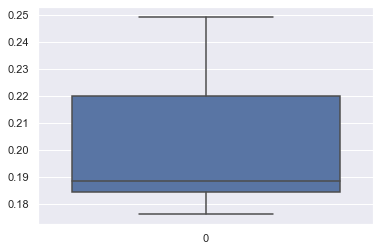

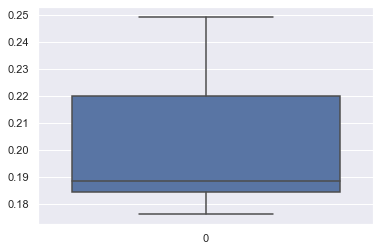

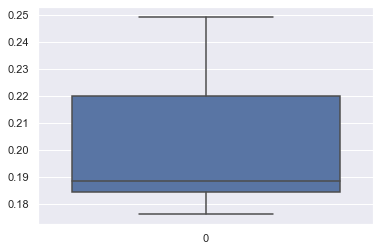

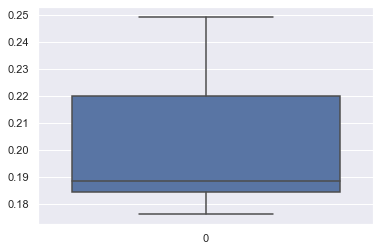

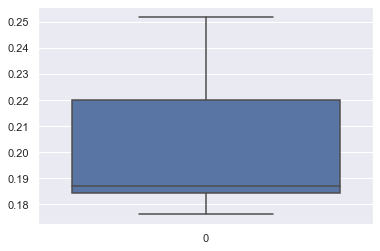

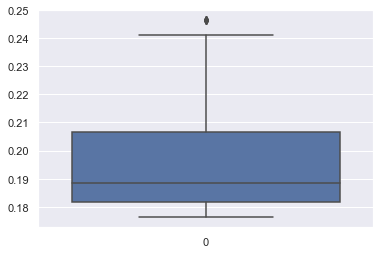

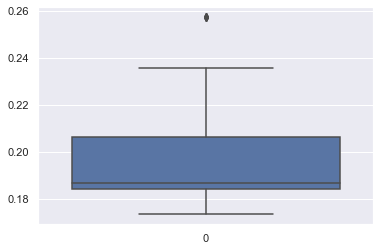

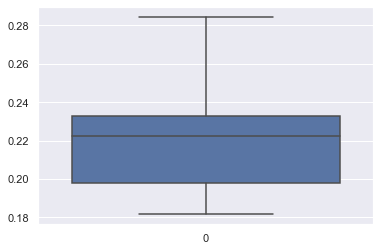

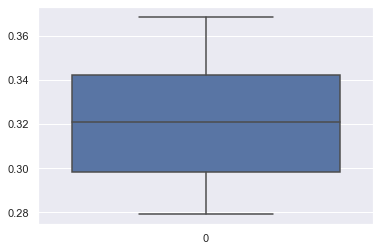

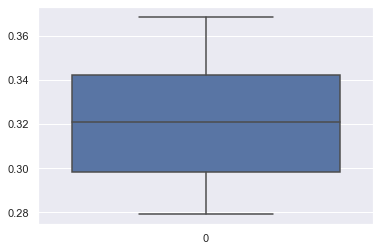

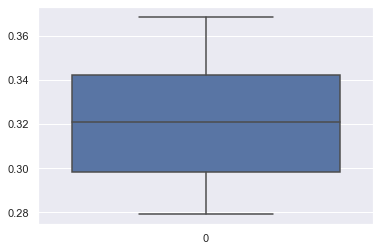

In [45]:
#Hacemos un loop para graficar los box plots para cada valor de lambda - LASSO
import seaborn as sns

configuraciones = [{"penalty":'l1', 'C':1/(10**-5)}, {"penalty":'l1', 'C':1/(10**-4)}, {"penalty":'l1', 'C':1/(10**-3)}, {"penalty":'l1', 'C':1/(10**-2)}, {"penalty":'l1', 'C':1/(10**-1)}, {"penalty":'l1', 'C':1/(10**0)}, {"penalty":'l1', 'C':1/(10**1)}, {"penalty":'l1', 'C':1/(10**2)}, {"penalty":'l1', 'C':1/(10**3)}, {"penalty":'l1', 'C':1/(10**4)}, {"penalty":'l1', 'C':1/(10**5)}]

for configuracion in configuraciones:
    input = cross_validation_alt("logit", 10, X, y, configuracion)
    sns.set()
    ss = sns.boxplot(data=input["ECM"])
    plt.show()   

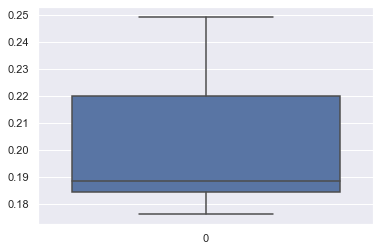

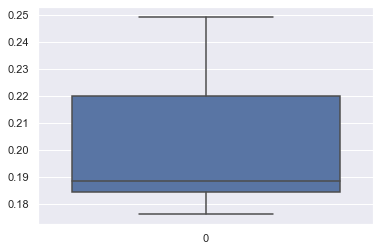

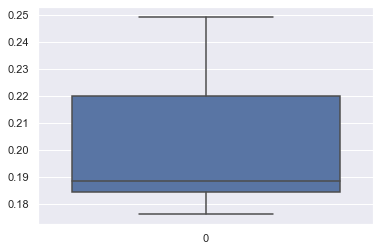

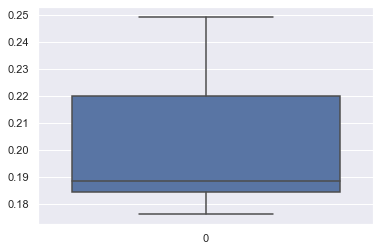

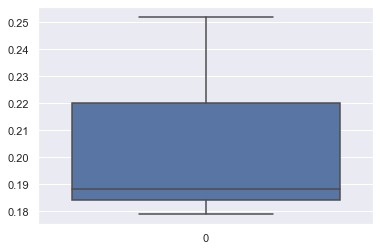

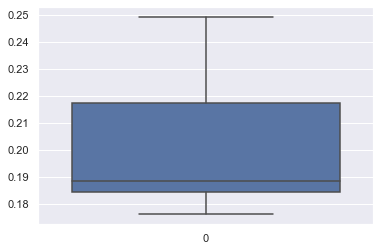

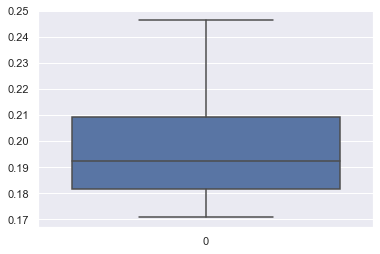

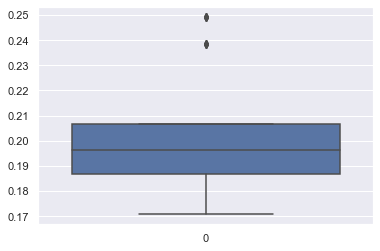

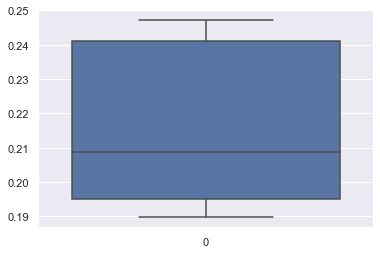

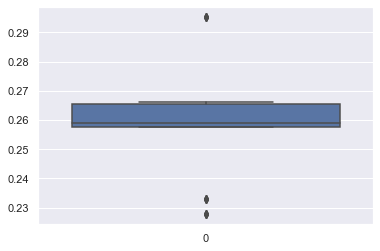

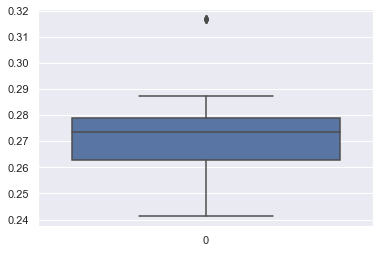

In [46]:
#Hacemos un loop para graficar los box plots para cada valor de lambda - RIDGE
import seaborn as sns

configuraciones = [{"penalty":'l2', 'C':1/(10**-5)}, {"penalty":'l2', 'C':1/(10**-4)}, {"penalty":'l2', 'C':1/(10**-3)}, {"penalty":'l2', 'C':1/(10**-2)}, {"penalty":'l2', 'C':1/(10**-1)}, {"penalty":'l2', 'C':1/(10**0)}, {"penalty":'l2', 'C':1/(10**1)}, {"penalty":'l2', 'C':1/(10**2)}, {"penalty":'l2', 'C':1/(10**3)}, {"penalty":'l2', 'C':1/(10**4)}, {"penalty":'l2', 'C':1/(10**5)}]

for configuracion in configuraciones:
    input = cross_validation_alt("logit", 10, X, y, configuracion)
    sns.set()
    ss = sns.boxplot(data=input["ECM"])
    plt.show()   

##### Boxplot con la proporción de variables ignoradas por el modelo en función de lamda

In [59]:
#Prueba para obtener los coeficientes del modelo con uno de los lamdas

configuracion = {"penalty":'l1', 'C':1/(10**-5)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

log_reg = LogisticRegression(penalty = "l1", C= 1/(10**-5), max_iter=10000, solver="liblinear")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

coef = log_reg.coef_
coef_reshape = coef.reshape((-1, 1))

print("Coeficientes del mejor modelo:")
coeficientes = pd.DataFrame(coef_reshape, index= X_train.columns)

coeficientes

Coeficientes del mejor modelo:


,0
AGLOMERADO_x,0.415986
ANO4_x,-0.001525
CAT_INAC,0.261055
CAT_OCUP,-0.054449
CH03,-0.027946
...,...
VII2_2,0.002053
VII2_3,-0.203753
VII2_4,0.000000
Varon,-2.118164


### 6)

In [61]:
# Chequeamos qué variables fueron descartadas para el valor óptimo de LASSO del inciso anterior (lamda = 1)

configuracion = {"penalty":'l1', 'C':1/(10**0)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

log_reg = LogisticRegression(penalty = "l1", C= 1/(10**0), max_iter=10000, solver="liblinear")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

coef = log_reg.coef_
coef_reshape = coef.reshape((-1, 1))

print("Coeficientes del modelo con lamda óptimo:")
coeficientes_lamda_optimo = pd.DataFrame(coef_reshape, index= X_train.columns)

coeficientes_lamda_optimo

Coeficientes del modelo con lamda óptimo:


,0
AGLOMERADO_x,0.469783
ANO4_x,-0.007951
CAT_INAC,0.246997
CAT_OCUP,-0.017518
CH03,-0.039825
...,...
VII2_2,-0.012488
VII2_3,-0.182902
VII2_4,0.000000
Varon,0.000000


In [63]:
# Exportamos la base para poder ver todos los coeficientes mejor:

coeficientes_lamda_optimo.to_excel("Coeficientes_punto6.xlsx")

En el caso del lamda óptimo hallado en el inciso anterior, las variables que son descartadas son:
- CH16: Dónde vivía hace 5 años
- H15: Entrevista individual realizada (sí/no)
- II3: Utiliza alguna habitación del hogar exclusivamente como lugar de trabajo (consultorio, estudio, taller, negocio, etc.)
- II4_1: Cuarto de cocina (sí/no)
- II6: De los lugares planteados en la pregunta 4 utiliza alguno exclusivamente como lugar de trabajo
- II6_1: No figura en el diccionario
- IV11: Cómo es el desague del baño
- IV12_1: La vivienda está ubicada cerca de un basural
- IV12_3: La vivienda está ubicada en villa de emergencia
- IX_MEN10: Cantidad de miembros del hogar menores de 10 años
- PP02C1: Hizo contactos, entrevistas (búsqueda laboral)
- PP02C3: Se presentó en establecimientos (búsqueda laboral)
- PP02C4: Hizo algo para ponerse por su cuenta (búsqueda laboral)
- PP02C5: Puso carteles en negocios, preguntó en el barrio (búsqueda laboral)
- PP02C8: De otra forma activa (búsqueda laboral)
- PP02H: En los últimos 12 meses, ¿buscó trabajo en algún momento?
- REALIZADA: Entrevista realizada (hogar respondió o no)
- REGION_x
- TRIMESTRE_x
- V15: En los últimos tres meses, las personas del hogar han vivido pedir préstamos a bancos, financieras, etc.
- V18: Tuvieron otros ingresos en efectivo (limosnas, juegos de azar, etc.)
- V19_A: ¿Menores de 10 años ayudan con algún dinero trabajando?
- V19_B: ¿Menores de 10 años ayudan con algún menores pidiendo?
- V3: En los últimos tres meses, las personas del hogar han vivido de indemnización por despido
- V4: En los últimos tres meses, las personas del hogar han vivido de seguro de desempleo
- V9: En los últimos tres meses, las personas del hogar han vivido ganancias de algún negocio en el que no trabajan
- VII2_4: Otras personas que ayudan en las tareas de la casa
- Varon: Variable armada por nosotras para poder adjuntar los valores de la tabla de equivalencias
- cte

En general, podemos observar que todas las variables que habíamos considerado como relevantes para evaluar los niveles de pobreza han sido conservadas por el modelo. Las que se han descartado tienen que ver con detalles más específicos acerca de las viviendas o los individuos, que no habíamos considerado como relevantes. Sin embargo, hay cuatro variables que nos llama la atención que no hayan sumado poder predictivo al modelo y hayan sido descartadas como, por ejemplo, si los menores de edad trabajan o ayudan pidiendo, si el hogar está cerca de un basural o si el hogar está en en un barrio de emergencia.

### 7)

Para responder este punto nos referiremos a todos los modelos de regresión logística que evaluamos en el inciso 5 de esta parte III del trabajo. En particular, aprovecharemos el hecho de que ambos métodos de regularización (Ridge y Lasso) obtuvieron el mismo lamda (lamda=1) como hiperparámetro óptimo. En este sentido, si observamos el ECM producido por cada una de los modelos de predicción, veremos que Lasso es el método de regularización que mejor funcionó: su ECM fue de 0.198091, mientras que el de Ridge, fue de 0.199516.

### 8)

In [66]:
configuraciones = [{"penalty":'l1', 'C':1},{"penalty":'l2', 'C':1}]
df= evalua_multiples_metodos(configuraciones, 10, X, y)
df

,Modelo,Configuracion,Error Cuadratico Medio,Matriz de confusion,Valor AUC,Accuracy score,K usados en vecinos cercanos,Configuración
0,Regresión Logística,NaN,0.198159,NaN,0.7608,0.81,,"{'penalty': 'l1', 'C': 1}"
1,Analisis discriminante lineal,NaN,0.194219,NaN,0.7553,0.81,,"{'penalty': 'l1', 'C': 1}"
2,Vecinos cercanos,NaN,0.216802,NaN,0.6925,0.78,La cantidad de vecinos cercanos utilizados es 10,"{'penalty': 'l1', 'C': 1}"


Para determinar cuál de todos los métodos es el que predice mejor, recurrimos a la función "evalua_multiples_metodos". Mediante esta, evaluamos diferentes métodos de predicción, tomando como configuración los hiperparámetros que en los incisos anteriores habíamos encontrado como los óptimos para el modelo de regresión logística. 

Así, podemos observar que tanto el modelo de "Regresión Logística" (con Lamda igual a 1 y el método de Lasso) como el de "Análisis Discrimante Lineal" están muy cercanos con los valores de las medidas de precisión. Incluso, se puede señalar que coinciden en el valor del "Accuracy score". Sin embargo, si nos guiáramos estrictamente por la medida del ECM, el modelo que convendría elegir dado que es el que mejor predice es el de Análisis Discriminante Lineal.

### 9)

In [72]:
lda = LinearDiscriminantAnalysis()        
lda = lda.fit(X= X_train, y=y_train)
        
# Realizamos las predicciones para la muestra de testeo
pobres_pred_lda = lda.predict(norespondieron)

C:\Users\lgild\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- cte

  warnings.warn(message, FutureWarning)


ValueError: X has 96 features, but LinearDiscriminantAnalysis is expecting 97 features as input.

In [75]:
X

,AGLOMERADO_x,ANO4_x,CAT_INAC,CAT_OCUP,CH03,CH04,CH06,CH07,CH08,CH09,...,V8,V9,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,Varon,cte
1,32,2022,0,3,1,1,48,1,1,1,...,2,2,2,0,98,0,0,0,1,1
2,33,2022,0,2,1,1,52,2,2,1,...,2,2,2,0,1,3,4,0,1,1
3,33,2022,4,0,1,1,54,1,4,1,...,2,2,1,2,98,0,0,0,1,1
6,33,2022,0,3,1,1,58,2,12,1,...,2,2,2,0,98,0,0,0,1,1
8,33,2022,0,3,1,1,48,2,1,1,...,2,2,2,0,98,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,33,2022,5,0,5,1,2,5,4,2,...,2,2,1,3,98,0,0,0,1,1
5225,33,2022,5,0,3,1,2,5,4,2,...,2,2,1,0,98,0,0,0,1,1
5226,33,2022,5,0,3,1,2,5,2,2,...,2,2,1,2,98,0,0,0,1,1
5228,33,2022,5,0,3,1,2,5,1,2,...,2,2,2,0,1,0,0,0,1,1


In [74]:
norespondieron

,ANO4_x,TRIMESTRE_x,NRO_HOGAR,REALIZADA,REGION_x,AGLOMERADO_x,PONDERA_x,IV1,IV2,IV3,...,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,Varon
0,2022,1,1,1,1,33,4625,2,2,1,...,0,0,0,0,0,0,0,2,2,1
4,2022,1,1,1,1,33,2309,1,4,1,...,0,0,0,0,0,0,0,0,0,1
5,2022,1,1,1,1,33,1640,1,3,2,...,0,0,0,0,0,0,0,2,2,1
7,2022,1,1,1,1,33,3738,2,3,1,...,0,0,0,0,0,0,0,0,0,1
14,2022,1,1,1,1,33,2724,1,3,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,2022,1,1,1,1,33,2177,2,3,1,...,0,0,0,0,0,0,0,0,0,1
5219,2022,1,1,1,1,32,1331,1,2,1,...,0,0,0,0,0,0,0,0,0,1
5221,2022,1,1,1,1,33,5664,1,3,1,...,0,0,0,0,0,0,0,0,0,1
5227,2022,1,1,1,1,33,2885,1,4,2,...,0,0,0,0,0,0,0,0,0,1
